In [349]:
import json
import datetime
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import tree

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split

import sklearn
import math
%matplotlib notebook

In [4]:
with open('data/dataset.json', 'r') as f:
    data = json.load(f)

In [13]:
data[0]['username']

'kissinfashion'

In [23]:
df = pd.DataFrame(data[0]['posts']['annotations'])

TypeError: list indices must be integers or slices, not str

In [153]:
#df.head()

In [28]:
data[0]['posts'][0]['instagram']['likes']

{'count': 1351}

In [34]:
posts = [ post['instagram']['likes'] for post in user['posts'] for user in data ]

NameError: name 'user' is not defined

In [53]:
struct = ([[user['id'], post['instagram']['likes']['count']]  for user in data for post in user['posts']])

In [152]:
df = pd.DataFrame(struct)
df.columns = ['id', 'likes']
#df

<IPython.core.display.Javascript object>


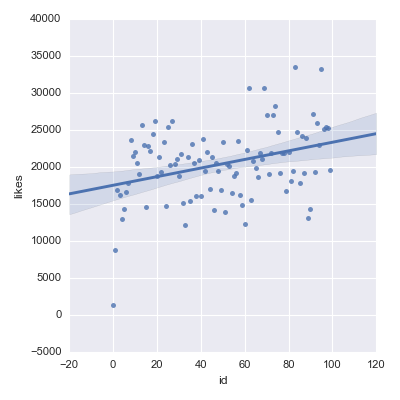

In [87]:
sns.lmplot(x='id', y='likes', data=first.iloc[0:100])

In [151]:
#first.iloc[0:100]

In [79]:
first = df[df['id'] == '528405678']
first['id'] = list(range(0, 1007))

/Users/ozeron/.virtualenvs/ml/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [154]:
#[post['annotations'].get('labelAnnotations') for post in data[0]['posts']]

In [234]:
id_annotations = [
    [post['instagram']['likes']['count'],
     [[annotation['description'], annotation['score']] for annotation in post['annotations'].get('labelAnnotations', [])]
    ] for post in data[0]['posts']]

In [241]:
for row in id_annotations:
    row.append((' ').join([ann for ann, _ in row [1]]))
    

In [226]:
idLabels = pd.DataFrame(id_labels)
idLabels.columns = ['likes', 'annotations']

In [227]:
#idLabels

In [247]:
cv = CountVectorizer()
clf = LinearRegression()

In [288]:
X_train, X_test, y_train, y_test = train_test_split([r[1] for r in id_annotations], [r[0] for r in id_annotations], test_size=0.2, random_state=0)

In [251]:
cv.fit(X_train, y_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [334]:
def row2vec(vectorizer, row):
    vectorized = cv.transform([''])
    for ann, score in row:
        vectorized += cv.transform([ann])
    return vectorized

def struct2vec(vectorizer, struct):
    rows = len(struct)
    columns = row2vec(vectorizer, struct[0]).shape[1]
    vect = scipy.sparse.csr.csr_matrix((rows,columns))
    for index, row in enumerate(struct):
        vect[index, :] = row2vec(vectorizer, row)
    return vect

vectorized = struct2vec(cv, X_train)

/Users/ozeron/.virtualenvs/ml/lib/python3.6/site-packages/scipy/sparse/compressed.py:774: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


In [335]:
clf.fit(vectorized, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [336]:
predict = clf.predict(struct2vec(cv, X_test))

/Users/ozeron/.virtualenvs/ml/lib/python3.6/site-packages/scipy/sparse/compressed.py:774: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


In [369]:
clf.score(struct2vec(cv, X_test), y_test)

/Users/ozeron/.virtualenvs/ml/lib/python3.6/site-packages/scipy/sparse/compressed.py:774: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


-0.57780029890440798

In [338]:
math.log(sklearn.metrics.mean_squared_error(y_test, predict))

17.705930958066237

<IPython.core.display.Javascript object>


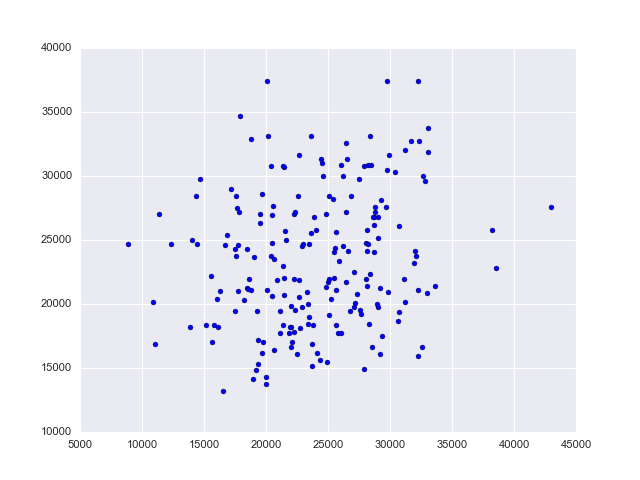

In [177]:
plt.scatter(y_test, predict)
#plt.scatter(range(len(y_test)), predict)

In [162]:
data[0]['posts'][0]['annotations'].keys()

dict_keys(['labelAnnotations', 'textAnnotations', 'safeSearchAnnotation', 'imagePropertiesAnnotation', 'cropHintsAnnotation', 'fullTextAnnotation', 'webDetection'])

In [411]:
# data[0]['posts'][0]['annotations']['fullTextAnnotation']

In [364]:
id_date = [
    [post['instagram']['likes']['count'],
     datetime.fromtimestamp(post['instagram']['date']).hour
    ] for post in data[0]['posts']]
plt.scatter(x = [x[1] for x in id_date], y =[x[0] for x in id_date])

<IPython.core.display.Javascript object>


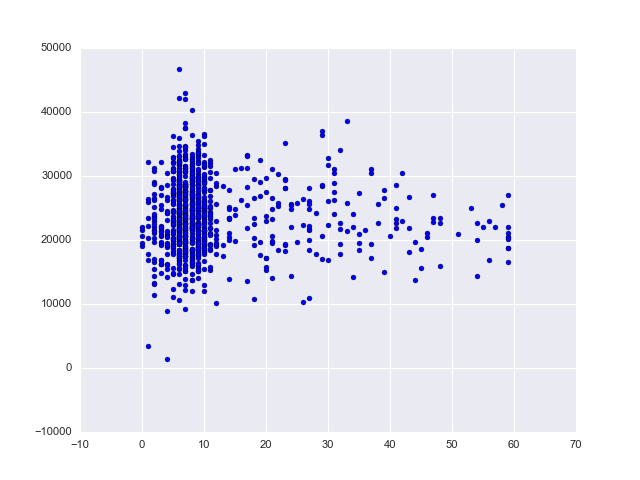

In [373]:
id_date = [
    [post['instagram']['likes']['count'],
     datetime.fromtimestamp(post['instagram']['date']).minute
    ] for post in data[0]['posts']]
plt.scatter(x = [x[1] for x in id_date], y =[x[0] for x in id_date])

In [271]:
cv.transform([''])

<1x397 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [361]:
from datetime import datetime
datetime.fromtimestamp(1490020454).hour

16

In [430]:
data[0]['posts'][2]['instagram']

{'__typename': 'GraphImage',
 'caption': 'Yes or No??? Credit @natali_danish',
 'code': 'BR6USaajMAM',
 'comments': {'count': 34},
 'comments_disabled': False,
 'date': 1490122990,
 'dimensions': {'height': 1349, 'width': 1080},
 'display_src': 'https://scontent-sjc2-1.cdninstagram.com/t51.2885-15/e35/17437551_281184838970297_5967223829288714240_n.jpg',
 'id': '1475581054160781324',
 'is_video': False,
 'likes': {'count': 16879},
 'owner': {'id': '528405678'},
 'thumbnail_src': 'https://scontent-sjc2-1.cdninstagram.com/t51.2885-15/s640x640/sh0.08/e35/c0.134.1080.1080/17437551_281184838970297_5967223829288714240_n.jpg'}

In [471]:
metadata = [
 {'likes_count': post['instagram'].get('likes', {}).get('count', 0),
  'comments_count': post['instagram'].get('comments', {}).get('count', 0), 
  'comments_disabled': post['instagram']['comments_disabled'],
  'timestamp': post['instagram']['date'],
  'weekday': datetime.fromtimestamp(post['instagram']['date']).weekday(),
  'hour': datetime.fromtimestamp(post['instagram']['date']).hour,
  'day': datetime.fromtimestamp(post['instagram']['date']).day,
  'caption': post['instagram'].get('caption'),
  'is_video': post['instagram']['is_video'],
  'owner': int(post['instagram']['owner']['id']),
 } 
 for posts in data for post in posts['posts']]

In [472]:
df = pd.DataFrame(metadata)

In [473]:
dataColumns = ['comments_count', 'day', 'hour', 'is_video','timestamp', 'weekday']
target = 'likes_count'

In [474]:
clf = LinearRegression()

In [475]:
X_train, X_test, y_train, y_test = train_test_split(df[dataColumns], df[target], test_size=0.2, random_state=0, stratify=df['owner'])

In [476]:
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [477]:
clf.score(X_test, y_test)

0.8283533917615773

In [470]:
data[3]['posts'][0]['instagram']

{'__typename': 'GraphImage',
 'caption': 'Dernier soir en Ecosse. Dernier soir dans le petit château. #Abritel #ChateauAbritel',
 'code': 'BR6fEt9l9ly',
 'comments': {'count': 21},
 'comments_disabled': False,
 'date': 1490128645,
 'dimensions': {'height': 749, 'width': 1080},
 'display_src': 'https://scontent-sjc2-1.cdninstagram.com/t51.2885-15/e35/17266200_383365235382123_8252413375863062528_n.jpg',
 'id': '1475628491588753778',
 'is_video': False,
 'likes': {'count': 1720},
 'owner': {'id': '356564939'},
 'thumbnail_src': 'https://scontent-sjc2-1.cdninstagram.com/t51.2885-15/s640x640/sh0.08/e35/c165.0.749.749/17266200_383365235382123_8252413375863062528_n.jpg'}

In [463]:
train_test_split?